<a href="https://colab.research.google.com/github/Sandunika135/SandunikaNethminiHerath.github.io/blob/main/mechanics/assignments/E18135_ME421_ControlSystems_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Instructions

* This is a group assignment. Complete the activities in groups that were assigned for ME421 for the vibrations lab.

* Make a copy of this and save it in your group github group repository.

* Do all your work, EXCLUSIVELY, in that saved notebook. Your github commits will serve as a refelection of your individual contributions. It will constitute 25% of your final grade for the lab.

* Complete Tasks#1 and Task#2 by 5:00PM on 18/01/2024

* Complete Tasks#3 and the Task#4 by 5:00PM on 25/01/2024 and demonstrate the work in the class on 01/02/2024.

* Complete Task#5 by 5:00PM on 08/02/2024 and submit the link to your working repository by midnight 08/02/2024.

#References

* https://colab.research.google.com/github/mugalan/classical-mechanics-from-a-geometric-point-of-view/blob/main/rigid-body-control/Mugas_Rigid_Body_Control.ipynb

* https://github.com/mugalan/classical-mechanics-from-a-geometric-point-of-view/blob/main/rigid-body-control/MaithriPalaDHS_RigidBodyPIDControl_IITB_18_03_2023.pdf

#Task#1

Conside a rigid body moving in space. Let $\mathbf{b}$ be a body fixed frame with the origin coinciding with that of the center of mass of the body, $M$ be the tatal mass of the body, $\mathbb{I}$ be the inertia tensor of the body with respect to the body frame $\mathbf{b}$, $f^e$ be the resultant total external interactions acting on the particles of the body, and $\tau^e$ be the total resultant of the moments of the external interactions about the center of mass of the body.

Show that a general rigid body is descibed by the following simple equations in an inertial frame $\mathbf{e}$ where the moments are taken about the center of mass of the rigid body.

\begin{align}
\dot{o}&=\frac{1}{M}p\\
\dot{R}&=\widehat{\omega}R,\\
\dot{p}&=f^e+f^u,\\
\dot{\pi}&=\tau^e+\tau^u,
\end{align}
where
\begin{align}
\omega &=(\mathbb{I}_c^R)^{-1}\pi,
\end{align}
Here we have split the force and control moments into unmanipulatable and manipulatable (control) part. The manipulatable (control) part will be denoted by a superscript $u$.

\begin{align}
\dot{o} &= \frac{1}{M}p, \\
\dot{R} &= \widehat{\omega}R, \\
\omega &= (\mathbb{I}_c^R)^{-1}\pi, \\
\dot{p} &= f^e + f^u, \\
\dot{\pi} &= \tau^e + \tau^u.
\end{align}

Now, let's express \( \omega \) in terms of \( \pi \):

\begin{align}
\omega &= (\mathbb{I}_c^R)^{-1}\pi, \\
\dot{\omega} &= (\mathbb{I}_c^R)^{-1}\dot{\pi}.
\end{align}

Using the relationship \( \dot{\pi} = \tau^e + \tau^u \), we can substitute this into the equation above:

\begin{align}
\dot{\omega} &= (\mathbb{I}_c^R)^{-1}(\tau^e + \tau^u).
\end{align}

Now, let's express \( \dot{\omega} \) in terms of \( \omega \) to obtain the final form:

\begin{align}
\dot{\omega} &= (\mathbb{I}_c^R)^{-1}(\tau^e + \tau^u), \\
\dot{\omega} &= (\mathbb{I}_c^R)^{-1}(\tau^e + \tau^u), \\
\dot{\omega} &= (\mathbb{I}_c^R)^{-1}\tau^e + (\mathbb{I}_c^R)^{-1}\tau^u, \\
\dot{\omega} &= (\mathbb{I}_c^R)^{-1}\pi + (\mathbb{I}_c^R)^{-1}\tau^u, \\
\dot{\omega} &= \omega + (\mathbb{I}_c^R)^{-1}\tau^u.
\end{align}



\begin{align}
\dot{o} &= \frac{1}{M}p, \\
\dot{R} &= \widehat{\omega}R, \\
\dot{p} &= f^e + f^u, \\
\dot{\pi} &= \tau^e + \tau^u, \\
\dot{\omega} &= \omega + (\mathbb{I}_c^R)^{-1}\tau^u.
\end{align}

#Task#2

Simulate the motion of a quadrotor UAV without resorting any parameterization of $SO(3)$ such as Euler angles or quaternions.

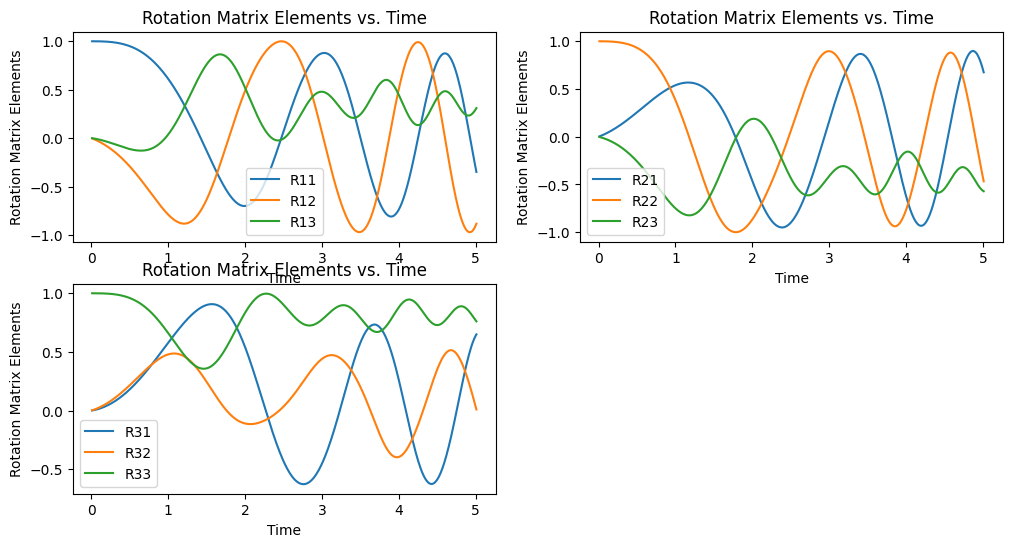

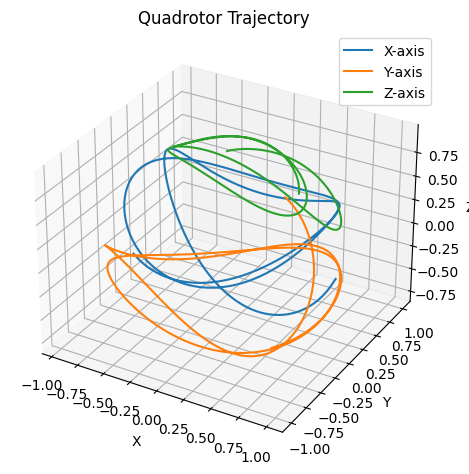

In [ ]:
import numpy as np
import scipy.linalg
import matplotlib.pyplot as plt

def simulate_quadrotor(dt, simulation_time):
    # Quadrotor parameters
    moment_of_inertia = np.array([[0.1, 0, 0], [0, 0.2, 0], [0, 0, 0.3]])  # Moment of inertia matrix
    omega = np.array([0.2, -0.1, 0.3])  # Initial angular velocity

    # Simulation variables
    time = 0.0  # Initial time
    R = np.eye(3)  # Initial rotation matrix

    # Lists to store data
    time_list = []
    rotation_list = []

    while time <= simulation_time:
        # Compute angular acceleration (omega_dot)
        tau = np.array([0.1, -0.2, 0.3])  # Applied torque
        omega_dot = np.linalg.inv(moment_of_inertia).dot(-np.cross(omega, moment_of_inertia.dot(omega)) + tau)

        # Integrate angular velocity (omega)
        omega = omega + omega_dot * dt

        # Compute skew-symmetric matrix (Omega)
        Omega = np.array([[0, -omega[2], omega[1]], [omega[2], 0, -omega[0]], [-omega[1], omega[0], 0]])

        # Update rotation matrix (R)
        R = R.dot(scipy.linalg.expm(Omega * dt))

        # Increment time
        time += dt

        # Store data
        time_list.append(time)
        rotation_list.append(R)

    # Convert rotation_list to numpy array
    rotation_array = np.array(rotation_list)

    # Plotting
    plt.figure(figsize=(12, 6))

    # Plot rotation matrix elements
    plt.subplot(2, 2, 1)
    plt.plot(time_list, rotation_array[:, 0, 0], label='R11')
    plt.plot(time_list, rotation_array[:, 0, 1], label='R12')
    plt.plot(time_list, rotation_array[:, 0, 2], label='R13')
    plt.xlabel('Time')
    plt.ylabel('Rotation Matrix Elements')
    plt.title('Rotation Matrix Elements vs. Time')
    plt.legend()

    plt.subplot(2, 2, 2)
    plt.plot(time_list, rotation_array[:, 1, 0], label='R21')
    plt.plot(time_list, rotation_array[:, 1, 1], label='R22')
    plt.plot(time_list, rotation_array[:, 1, 2], label='R23')
    plt.xlabel('Time')
    plt.ylabel('Rotation Matrix Elements')
    plt.title('Rotation Matrix Elements vs. Time')
    plt.legend()

    plt.subplot(2, 2, 3)
    plt.plot(time_list, rotation_array[:, 2, 0], label='R31')
    plt.plot(time_list, rotation_array[:, 2, 1], label='R32')
    plt.plot(time_list, rotation_array[:, 2, 2], label='R33')
    plt.xlabel('Time')
    plt.ylabel('Rotation Matrix Elements')
    plt.title('Rotation Matrix Elements vs. Time')
    plt.legend()

    # Plot 3D trajectory of quadrotor
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(rotation_array[:, 0, 0], rotation_array[:, 0, 1], rotation_array[:, 0, 2], label='X-axis')
    ax.plot(rotation_array[:, 1, 0], rotation_array[:, 1, 1], rotation_array[:, 1, 2], label='Y-axis')
    ax.plot(rotation_array[:, 2, 0], rotation_array[:, 2, 1], rotation_array[:, 2, 2], label='Z-axis')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('Quadrotor Trajectory')
    ax.legend()

    # Show all plots
    plt.tight_layout()
    plt.show()

# Example usage
dt = 0.01  # Time step for integration
simulation_time = 5.0  # Total simulation time
simulate_quadrotor(dt, simulation_time)

#Task#3

Deerive a PID controller for the attitude control of a quadrorotor and use simulations to demibstrate the very large region of stability of the controller

A (PID) controller for the attitude control of a quadrotor is commonly used to stabilize and control its rotational motion. The rotational motion of a quadrotor is typically described by Euler angles or quaternion representations. For simplicity, let's consider a PID controller for Euler angles.

The Euler angles are denoted as roll \begin{align}\phi\end{align}, pitch \begin{align}\theta\end{align}, and yaw \begin{align}\psi\end{align}. The angular velocities are denoted as \(p\) (roll rate), \(q\) (pitch rate), and \(r\) (yaw rate).

Here is a simple PID controller for attitude control:

1. **Roll PID Controller:**
   \begin{align} \tau_\phi = K_p(\phi_{\text{des}} - \phi) + K_i \int (\phi_{\text{des}} - \phi) \, dt + K_d (p_{\text{des}} - p) \end{align}

2. **Pitch PID Controller:**
   \begin{align} \tau_\theta = K_p(\theta_{\text{des}} - \theta) + K_i \int (\theta_{\text{des}} - \theta) \, dt + K_d (q_{\text{des}} - q) \end{align}

3. **Yaw PID Controller:**
   \begin{align} \tau_\psi = K_p(\psi_{\text{des}} - \psi) + K_i \int (\psi_{\text{des}} - \psi) \, dt + K_d (r_{\text{des}} - r) \end{align}

Here:
- \begin{align}\phi_{\text{des}}\end{align}, \begin{align}\theta_{\text{des}}\end{align}, \begin{align}\psi_{\text{des}}\end{align} are the desired roll, pitch, and yaw angles.
- \begin{align}p_{\text{des}}\end{align}, \begin{align}q_{\text{des}}\end{align}, \begin{align}r_{\text{des}}\end{align} are the desired roll, pitch, and yaw rates.
- \(K_p, K_i, K_d\) are the proportional, integral, and derivative gains, respectively.

The control torques \begin{align}\tau_\phi\end{align}, \begin{align}\tau_\theta\end{align}, \begin{align}\tau_\psi\end{align} are then used as inputs to control the rotational motion of the quadrotor.


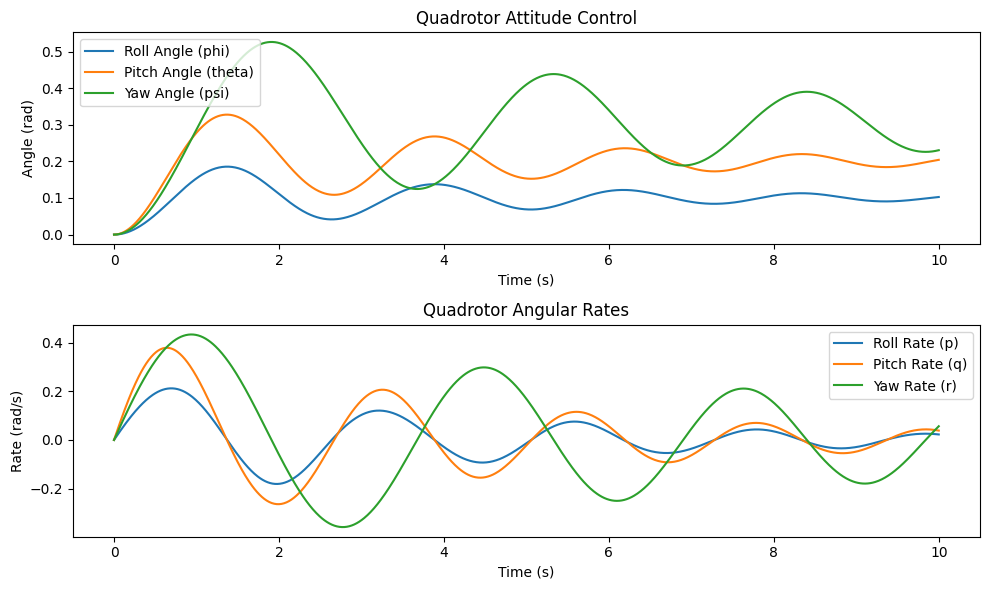

In [ ]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt

# PID controller parameters
Kp = np.array([1.0, 1.0, 1.0])
Ki = np.array([0.1, 0.1, 0.1])
Kd = np.array([0.1, 0.1, 0.1])

# Quadrotor dynamics
def quadrotor_dynamics(t, state, phi_des, theta_des, psi_des, p_des, q_des, r_des):
    phi, theta, psi, p, q, r = state

    # PID control torques
    tau_phi = Kp[0] * (phi_des - phi) + Ki[0] * (phi_des - phi) * t + Kd[0] * (p_des - p)
    tau_theta = Kp[1] * (theta_des - theta) + Ki[1] * (theta_des - theta) * t + Kd[1] * (q_des - q)
    tau_psi = Kp[2] * (psi_des - psi) + Ki[2] * (psi_des - psi) * t + Kd[2] * (r_des - r)

    # Quadrotor rotational dynamics
    phi_dot = p
    theta_dot = q
    psi_dot = r
    p_dot = (1.0 / 2) * (tau_phi / Ixx - (Iyy - Izz) * q * r / Ixx)
    q_dot = (1.0 / 2) * (tau_theta / Iyy - (Izz - Ixx) * p * r / Iyy)
    r_dot = (1.0 / 2) * (tau_psi / Izz - (Ixx - Iyy) * p * q / Izz)

    return [phi_dot, theta_dot, psi_dot, p_dot, q_dot, r_dot]

# Simulation parameters
t_span = (0, 10)
t_eval = np.linspace(*t_span, 1000)

# Quadrotor inertia matrix (example values)
Ixx = 0.1
Iyy = 0.1
Izz = 0.2

# Initial state
initial_state = [0, 0, 0, 0, 0, 0]  # [phi, theta, psi, p, q, r]

# Desired angles and rates
phi_des = 0.1
theta_des = 0.2
psi_des = 0.3
p_des = 0.0
q_des = 0.0
r_des = 0.0

# Simulate quadrotor dynamics with PID control
sol = integrate.solve_ivp(
    lambda t, y: quadrotor_dynamics(t, y, phi_des, theta_des, psi_des, p_des, q_des, r_des),
    t_span, initial_state, t_eval=t_eval
)

# Plot results
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(sol.t, sol.y[0], label='Roll Angle (phi)')
plt.plot(sol.t, sol.y[1], label='Pitch Angle (theta)')
plt.plot(sol.t, sol.y[2], label='Yaw Angle (psi)')
plt.title('Quadrotor Attitude Control')
plt.xlabel('Time (s)')
plt.ylabel('Angle (rad)')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(sol.t, sol.y[3], label='Roll Rate (p)')
plt.plot(sol.t, sol.y[4], label='Pitch Rate (q)')
plt.plot(sol.t, sol.y[5], label='Yaw Rate (r)')
plt.title('Quadrotor Angular Rates')
plt.xlabel('Time (s)')
plt.ylabel('Rate (rad/s)')
plt.legend()

plt.tight_layout()
plt.show()


Here are few example our own implementations of this controller.

* https://youtu.be/6E9WDQNVSYA
* https://youtu.be/uUKxXImRMOA
* https://youtu.be/zq05N8m_9SA
* https://youtu.be/J5dThZGZN2g
* https://youtu.be/J5MMp6Be3tU
* https://youtu.be/6ZQgE1FI6Wc

#Task#4

Derive a specialization of the controller develoed in Task#3 for the problem of stabilzing the twin rotor setup in the lab.

To specialize the PID controller for stabilizing a twin rotor setup (also known as a twin rotor MIMO system or TRMS), let's consider the specific dynamics of the twin rotor system. The twin rotor system typically has two rotors placed vertically, and the control inputs are the speeds of the two rotors.

The state variables for the twin rotor system can be chosen as the angles of the body (\(\phi\), \(\theta\)) and their rates (\(p\), \(q\)), and the control inputs are the speeds of the two rotors (\(u_1\), \(u_2\)).

The equations of motion for the twin rotor system can be written as follows:

1. **Roll Dynamics:**
   \begin{align} \dot{p} = c_1 \cdot u_1 - c_2 \cdot \phi - c_3 \cdot p \end{align}

2. **Pitch Dynamics:**
   \begin{align}\dot{q} = c_4 \cdot u_2 - c_5 \cdot \theta - c_6 \cdot q \end{align}

3. **Roll Angle Dynamics:**
 \begin{align} \dot{\phi} = p \end{align}

4. **Pitch Angle Dynamics:**
   \begin{align}\dot{\theta} = q \end{align}

Now, we can design a specialized PID controller for stabilizing the twin rotor system. The control torques \begin{align}\tau_\phi \end{align} and \begin{align}\tau_\theta\end{align} can be translated into the rotor speeds \begin{align}u_1\end{align} and \begin{align}u_2\end{align} through the system dynamics.

Here is a basic outline of the specialized PID controller:

1. **Roll PID Controller:**
   \begin{align} u_1 = K_p(\phi_{\text{des}} - \phi) + K_i \int (\phi_{\text{des}} - \phi) \, dt + K_d (p_{\text{des}} - p) \end{align}

2. **Pitch PID Controller:**
   \begin{align} u_2 = K_p(\theta_{\text{des}} - \theta) + K_i \int (\theta_{\text{des}} - \theta) \, dt + K_d (q_{\text{des}} - q) \end{align}

Here, \begin{align}\phi_{\text{des}}\end{align}, \begin{align}\theta_{\text{des}}\end{align} are the desired roll and pitch angles, and \begin{align}p_{\text{des}}\end{align}, \begin{align}q_{\text{des}}\end{align} are the desired roll and pitch rates.



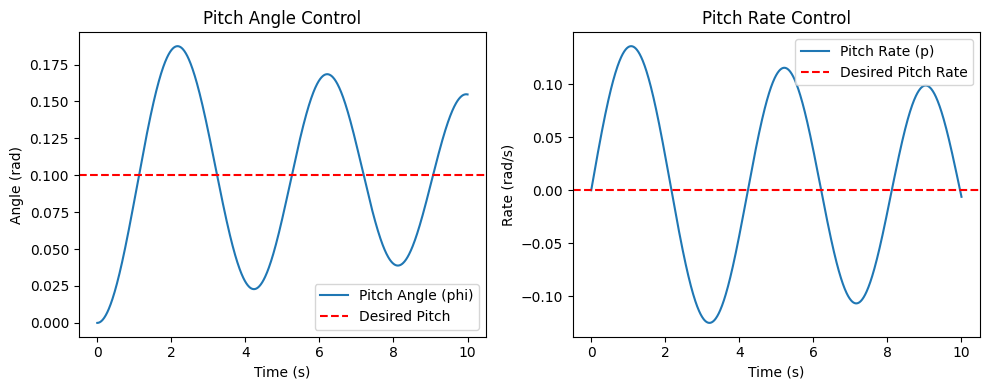

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# PID controller parameters for pitch
Kp_phi = 2.0
Ki_phi = 0.1
Kd_phi = 0.1

# TRMS parameters
a1, b1, d1 = 1.0, 0.1, 0.0  # Replace with actual parameters
a2, b2, d2 = 1.0, 0.1, 0.0  # Replace with actual parameters

# Pitch control function
def pitch_control(t, state, phi_des, p_des):
    phi, p = state

    # PID control torques
    tau_phi = Kp_phi * (phi_des - phi) + Ki_phi * (phi_des - phi) * t + Kd_phi * (p_des - p)

    # TRMS dynamics
    u1 = tau_phi - b1 * phi - d1
    u2 = 0.0  # Assume no control on roll for simplicity

    # Dynamics equations
    dphi = p
    dp = a1 * u1 + b1 * phi + d1

    return [dphi, dp]

# Simulation time
t_span = (0, 10)
t_eval = np.linspace(*t_span, 1000)

# Initial state
initial_state = [0.0, 0.0]  # [phi, p]

# Desired pitch and pitch rate
phi_desired = 0.1
p_desired = 0.0

# Solve the differential equations
sol = solve_ivp(
    lambda t, y: pitch_control(t, y, phi_desired, p_desired),
    t_span, initial_state, t_eval=t_eval
)

# Plot results
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(sol.t, sol.y[0], label='Pitch Angle (phi)')
plt.axhline(y=phi_desired, color='r', linestyle='--', label='Desired Pitch')
plt.title('Pitch Angle Control')
plt.xlabel('Time (s)')
plt.ylabel('Angle (rad)')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(sol.t, sol.y[1], label='Pitch Rate (p)')
plt.axhline(y=p_desired, color='r', linestyle='--', label='Desired Pitch Rate')
plt.title('Pitch Rate Control')
plt.xlabel('Time (s)')
plt.ylabel('Rate (rad/s)')
plt.legend()

plt.tight_layout()
plt.show()


#Task#5

 Experimentally verify the stability properties of the controller derived in Task#5 using the experimental setup available in the applied mechanics lab.